<a name="top"></a>
<div style="width:600 px">

<div style="float:right; width:340 px; height:300px;">
<img src="https://raw.githubusercontent.com/unidata/drilsdown/master/docs/_static/DRILSDOWN_logo.png" alt="DRILSDOWN Logo" style="height: 300px;">
</div>

<div style="float:right; width:98 px; height:98px;">
<img src="https://www.earthcube.org/sites/default/files/doc-repository/logo_earthcube_cube-only_SMALL.png" alt="Earthcube Logo" style="height: 98px;">
</div>


<h1>DRILSDOWN Case Study</h1>
<h2>Notebook your IDV visualization journey</h2>
<h3>and connect its data sources to Python tools</h3>

-------------
### See the [0:59 YouTube video intro](https://youtu.be/JQ0kBy472FU) that uses this notebook.

### Documentation is [here](http://unidata.github.io/drilsdown), from [this github code repo](http://github.com/unidata/drilsdown).

<div style="clear:both"></div>
</div>

<hr style="height:2px;">



### Sections
1. <a href="#install">Install & launch ipython_IDV</a>
1. <a href="#capture">Capture images & movies (and optionally, replication bundles)</a>
1. <a href="#python">Python interaction with your IDV session</a>
1. <a href="#publish">Publish to a RAMADDA repository</a>


<a name="install"></a>
# Install the DRILSDOWN package, and launch

## Already a Jupyter user? 
Install the DRILSDOWN package. 
The cell below installs the DRILSDOWN package and its dependencies in your existing environment, using [this tactic](http://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/).

In [6]:
import sys
!{sys.executable} -m pip install drilsdown --upgrade   ### install or upgrade pip package

#NO CONDA YET... !conda install --yes --prefix {sys.prefix} drilsdown  ### for conda package 

Requirement already up-to-date: drilsdown in /Users/willytsai/anaconda2/lib/python2.7/site-packages (2.4.8)
Requirement not upgraded as not directly required: xarray in /Users/willytsai/anaconda2/lib/python2.7/site-packages (from drilsdown) (0.10.7)
Requirement not upgraded as not directly required: jython-kernel in /Users/willytsai/anaconda2/lib/python2.7/site-packages (from drilsdown) (2.4.3)
Requirement not upgraded as not directly required: ramadda-publish in /Users/willytsai/anaconda2/lib/python2.7/site-packages (from drilsdown) (1.3)
Requirement not upgraded as not directly required: jupyter-client in /Users/willytsai/anaconda2/lib/python2.7/site-packages (from drilsdown) (5.1.0)
Requirement not upgraded as not directly required: geoviews in /Users/willytsai/anaconda2/lib/python2.7/site-packages (from drilsdown) (1.5.1)
Requirement not upgraded as not directly required: MetPy in /Users/willytsai/anaconda2/lib/python2.7/site-packages (from drilsdown) (0.8.0)
Requirement not upgrad

Requirement not upgraded as not directly required: certifi in /Users/willytsai/anaconda2/lib/python2.7/site-packages (from tornado>=4.0->ipykernel->drilsdown) (2018.4.16)
Requirement not upgraded as not directly required: backports_abc>=0.4 in /Users/willytsai/anaconda2/lib/python2.7/site-packages (from tornado>=4.0->ipykernel->drilsdown) (0.5)
Requirement not upgraded as not directly required: wcwidth in /Users/willytsai/anaconda2/lib/python2.7/site-packages (from prompt_toolkit<2.0.0,>=1.0.4->IPython>=3.0->jython-kernel->drilsdown) (0.1.7)
Requirement not upgraded as not directly required: scandir in /Users/willytsai/anaconda2/lib/python2.7/site-packages (from pathlib2->IPython>=3.0->jython-kernel->drilsdown) (1.6)
Requirement not upgraded as not directly required: MarkupSafe>=0.23 in /Users/willytsai/anaconda2/lib/python2.7/site-packages (from Jinja2>=2.7->bokeh>=0.12.15->geoviews->drilsdown) (1.0)
Requirement not upgraded as not directly required: functools32 in /Users/willytsai/an

## New to Jupyter? 
Create and use our DRILSDOWN environment in Anaconda. 

Uncomment and use the cell below to download our environment.yml file. Then, [import the environment](https://docs.anaconda.com/anaconda/navigator/tutorials/manage-environments#importing-an-environment) (it takes a few minutes as packages are installed). Finally, launch jupyter notebook after selecting the DRILSDOWN [environment (channel)](https://docs.anaconda.com/_images/navigator-home-1-6.png). More in this [science-oriented guide to Jupyter notebooks](https://unidata.github.io/online-python-training/notebook.html)

In [7]:
# The 3 lines here will download DRILSDOWN's environment.yml file
# Then use Navigator to create environment from it as explained above

#import requests
#r = requests.get('https://raw.githubusercontent.com/Unidata/drilsdown/master/environment.yml', allow_redirects=True)
#open('DRILSDOWN_environment.yml', 'wb').write(r.content)

# Launch! 
After executing this cell, you should see this [Control Panel](https://github.com/Unidata/drilsdown/blob/master/docs/_static/ipython_IDV_ControlPanel.png). 

**Buttons** append their outputs to the Control Panel's results area. **Clear Outputs** will clear the whole cell. 

In [8]:
# Load ipython_IDV extension. If successful, It will make a user interface (Control Panel) widget.

%reload_ext ipython_IDV

### Code route: You can also get a GUI display of a set of IDV bundles using [this example](https://github.com/Unidata/drilsdown/blob/master/UseCase_Examples/Basic_Examples/Expose_RAMADDA_content_code.ipynb)

<a href="#top">Top</a>
<hr style="height:2px;">

<a name="capture"></a>

## Operate the IDV and capture images, movies, & bundles (state files)

### 1. **[Install](https://www.unidata.ucar.edu/downloads/idv/nightly/index.jsp) and learn** to operate the IDV: Consider my [IDV intro .ppt](http://weather.rsmas.miami.edu/repository/entry/show?entryid=dd95b65c-09a5-43a5-9f44-da5243e302f4), or [Unidata's documentation](https://www.unidata.ucar.edu/software/idv/#documentation) and [tutorial](https://www.unidata.ucar.edu/software/idv/docs/workshop/).

### 2. **Launch** the IDV on this machine (from your Control Panel, or manually). 
    Linux users may need to set a path for the Launch IDV button to work

### 3. **Display** something meaningful in the IDV. 

Perhaps by [loading a bundle](https://www.unidata.ucar.edu/software/idv/docs/userguide/Bundles.html) from our [MapesIDVcollection](http://weather.rsmas.miami.edu/repository/entry/show?entryid=115a4ff0-10de-4fba-86d7-66cd42d6d8de) or some other [Catalog](https://www.unidata.ucar.edu/software/idv/docs/userguide/data/choosers/CatalogChooser.html), or uncomment the following cell for a standard example.

In [9]:
# If you want to load a standard illustration bundle, uncomment this command
#%load_bundle https://geodesystems.com/repository/entry/get/example_grid.xidv?entryid=4728e5eb-fa89-4af8-8162-e2f66a9cd0c9

In [19]:
runIDV -islfile capture.py

SyntaxError: invalid syntax (<ipython-input-19-0af2c4a08f52>, line 1)

In [18]:
%export_data

ERROR:root:Line magic function `%export_data` not found.


### The cells below capture your IDV session's images and movies

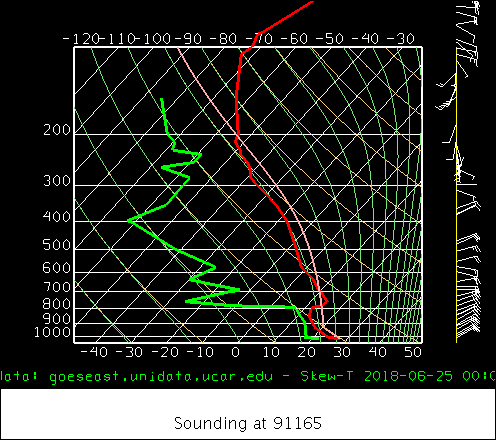

In [17]:
%make_image -display sounding -caption 'Sounding at 91165'

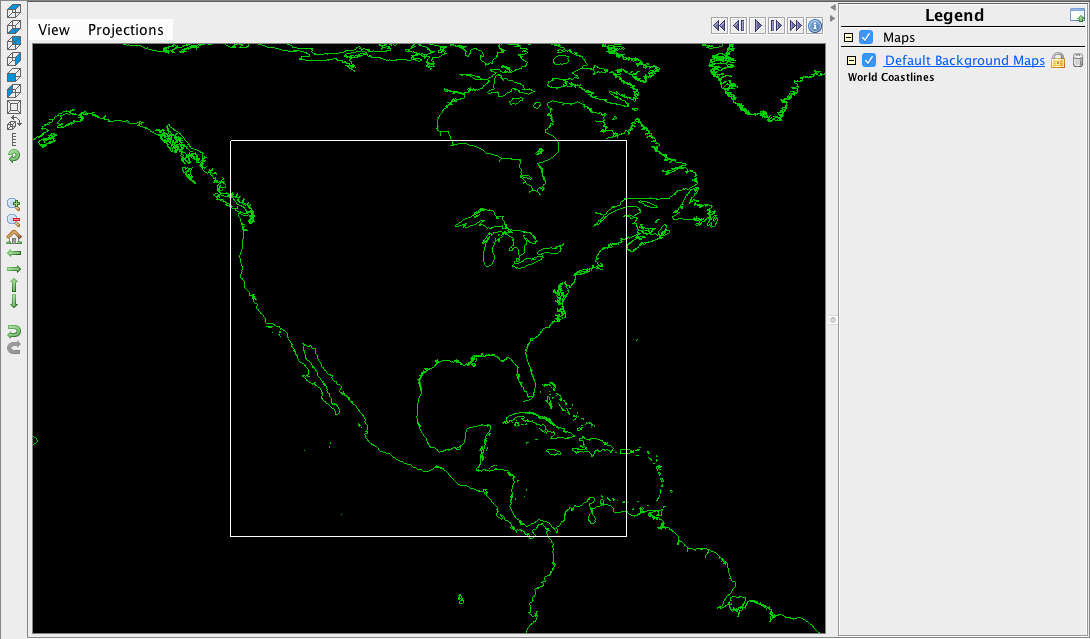

In [12]:
%make_image -capture legend 

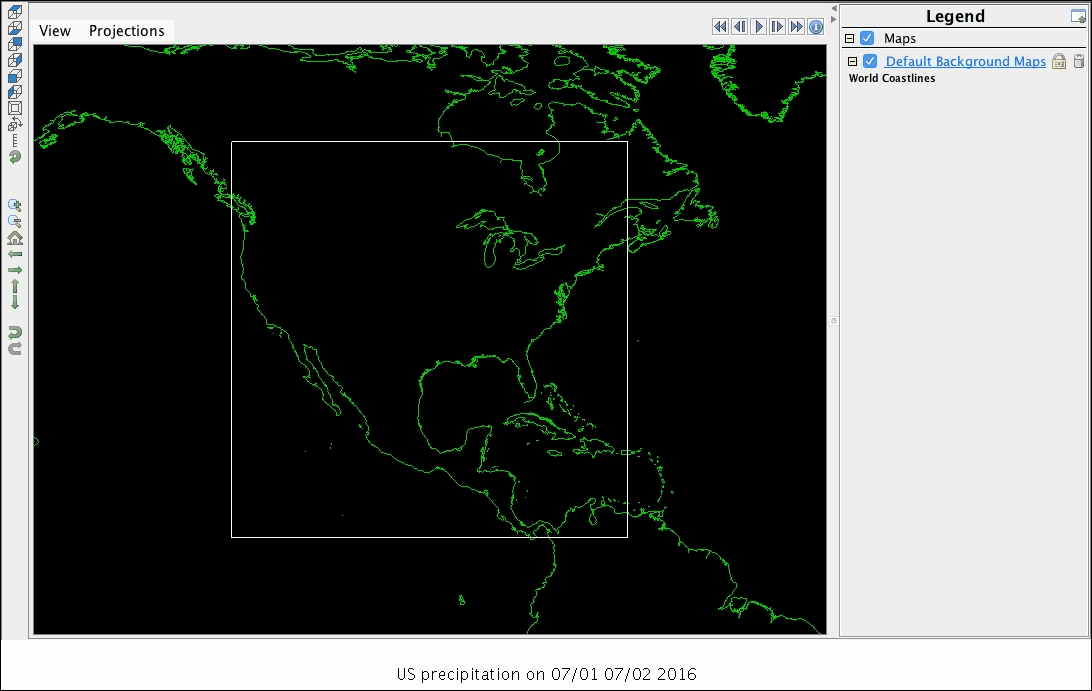

In [13]:
%make_movie -capture legend -caption "US precipitation on 07/01-07/02 2016"

### For exact replicability, capture a <1 MB sized IDV state bundle and embed it in this notebook

In [14]:
%save_bundle -embed 

HTML(value=u'<a target=_bundle download="idv.xidv" href="data:text/xidv;name=idv.xidv;base64,PD94bWwgdmVyc2lvb…

<a name="advanced"></a>
#### An advanced code route:  [capture multiple movies of different regions of a bundle](https://github.com/Unidata/drilsdown/blob/master/UseCase_Examples/Basic_Examples/Code_capture_IDV_multiple_movies.ipynb)
#### (*takes a couple minutes!*)

<a href="#top">Top</a>
<hr style="height:2px;">

<a name="python"></a>
## The path to Python

You can also pass data back and forth with the IDV. Currently, this involves reading and writing local netCDF files on disk. 

### Reading from IDV: example is [here](https://github.com/Unidata/drilsdown/blob/master/UseCase_Examples/Basic_Examples/Load_IDVdata_into_python.ipynb) with key lines below, commented out

In [15]:
from ipython_IDV import Idv
data = Idv.export_data(display_id='windspeed')
windspeed=data.variables['WindSpeed']
print(windspeed)

An error has occurred:Could not find display with id:windspeed


AttributeError: 'NoneType' object has no attribute 'variables'

### Writing data into the IDV session: example is [here](https://github.com/Unidata/drilsdown/blob/master/UseCase_Examples/Basic_Examples/Sent_python_data_to_IDV.ipynb)

### using our new  .to_IDV() method in xarray

<a href="#top">Top</a>
<hr style="height:2px;">

<a name="publish"></a>
# Publishing to a RAMADDA repository
maybe [ours](http://weather.rsmas.miami.edu/repository/entry/show?entryid=9ae3aea4-a86e-4592-b686-20398e698987)

### Everything in RAMADDA is an *entry,* with an *entry type*. 

## 1. To publish an *IDV bundle* entry type, with a quicklook image:


1. In your IDV, install the [RAMADDA publisher plugin](https://www.unidata.ucar.edu/software/idv/docs/workshop/savingstate/Ramadda.html). 

2. Publisher-->Configure like [this](https://github.com/Unidata/drilsdown/blob/master/docs/_static/ConfigureIDVPublisher_screenshot.png)

3. Select the "publish" checkbox in the ipython_IDV Control Panel, [and click Make Image button](https://github.com/Unidata/drilsdown/blob/master/docs/_static/Publish_from_IDV_example.png). Then follow the dialog in the IDV session, finding a folder that you have permissions in (like the Contributed folder). An actual example created this way is [here](http://weather.rsmas.miami.edu/repository/entry/show?entryid=593c2d1e-d35a-474e-8ff9-36bc68fe0a44).

#### *Note: if you publish to my anonymous-upload folder, an [admin](mailto:mapes@miami.edu) needs to be asked to go in and permit it to be displayed.*

In [ ]:
%reload_ext ipython_IDV


## 2. To publish an *DRILSDOWN Case Study* entry type:

### A *DRILSDOWN Case Study* folder contains a .ipynb notebook, a .zidv or .xidv IDV bundle, and any other files. 

#### RAMADDA displays a *DRILSDOWN Case Study* in a viewer-friendly manner like [this](http://weather.rsmas.miami.edu/repository/entry/show?entryid=9ae3aea4-a86e-4592-b686-20398e698987). 

In the future, other services could be added to this specific entry type (like composite averages of a set of identically-shaped .zidv files). 

--------------- 
# Work unfinshed below here 

## Let's publish *this notebook* using Python code calls: 

In [ ]:
%publish_notebook "http://weather.rsmas.miami.edu/repository/entry/show?entryid=e322e383-f409-41ee-b50f-e6d3be3625c1"

In [ ]:
# Publish in the Contributed folder, 
# http://weather.rsmas.miami.edu/repository/entry/show?entryid=e322e383-f409-41ee-b50f-e6d3be3625c1

from ipython_IDV import Ramadda
RAM = Ramadda("http://weather.rsmas.miami.edu/repository/entry/show?entryid=e322e383-f409-41ee-b50f-e6d3be3625c1")

In [ ]:
# USER and PASSWORD can be blank for that Contributed folder

import os
os.environ['RAMADDA_USER'] = ""
os.environ['RAMADDA_PASSWORD'] = ""
RAM.publish('Test_Publish', file="./Install_and_demo.ipynb")

<a href="#top">Top</a>
<hr style="height:2px;">

<a name="coding"></a>
## Coding the production of Case Studies

### idv_teleport 
**idv_teleport** is DRILSDOWN's Python and command-line scripting tool to batch-generate **one, or a set (folder)** of data-zipped (.zidv) bundles with user-defined *time range* and *bounding box*, [like this set](http://weather.rsmas.miami.edu/repository/entry/show?entryid=4370a4c4-0a80-4469-ba04-8861b462aad3). 

The -h or -help argument explains its use, or [see the repo](https://github.com/suvarchal/IDV_teleport). 

### ramadda_publish
**ramadda_publish** publishes files or folders to a RAMADDA. If your folder contains .ipynb notebooks, and is tagged as a DRILSDOWN Case Study, it will be displayed like this [library of Case Studies](http://weather.rsmas.miami.edu/repository/entry/show?entryid=9ae3aea4-a86e-4592-b686-20398e698987). 

Again the -h argument or [the repo](https://github.com/suvarchal/ramadda_publish) explains its use. 

# Not yet written...

<a href="#top">Top</a>
<hr style="height:2px;">

In [ ]:
# Time stamp this notebook 
!date